In [43]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
X = iris.data[:100]
y = iris.target[:100]

In [45]:
X_t = torch.FloatTensor(X)
y_t = torch.FloatTensor(y)

In [46]:
print(X_t.dtype)
print(y_t.dtype)

torch.float32
torch.float32


In [47]:
print(X_t.shape)
print(y_t.shape)

torch.Size([100, 4])
torch.Size([100])


In [48]:
print(X_t[0:5,:])
print(y_t[0:5])

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])
tensor([0., 0., 0., 0., 0.])


In [85]:
from data.load_data import load_data_iris
xx, yy = load_data_iris()
print(xx.dtype)
print(yy.dtype)

torch.float32
torch.float32


In [49]:
net = nn.Linear(4,1)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(net.parameters(), lr=0.25)

In [50]:
losses = []
for epoc in range(100):
    optimizer.zero_grad()

    y_pred = net(X_t)

    loss = loss_fn(y_pred.view_as(y_t), y_t)
    loss.backward()

    optimizer.step()

    losses.append(loss.item())

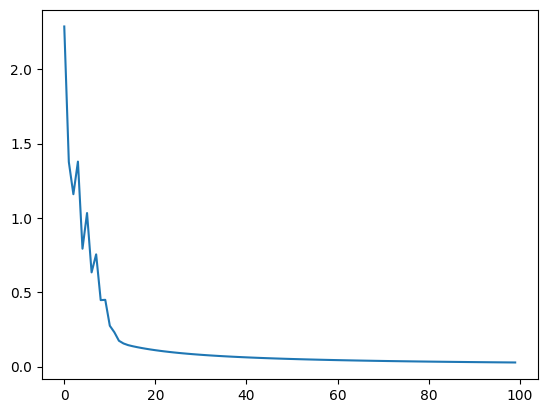

In [51]:
from matplotlib import pyplot as plt
plt.plot(losses)

In [52]:
h = net(X_t)
print(h.shape)
print(h[0:5,:])


torch.Size([100, 1])
tensor([[-4.0186],
        [-3.1791],
        [-3.6235],
        [-2.9667],
        [-4.1252]], grad_fn=<SliceBackward0>)


tensor(0) tensor(99)
tensor(-5.5399, grad_fn=<MinBackward1>) tensor(6.2483, grad_fn=<MaxBackward1>)


(0.0, 99.0, -8.539891242980957, 9.248321533203125)

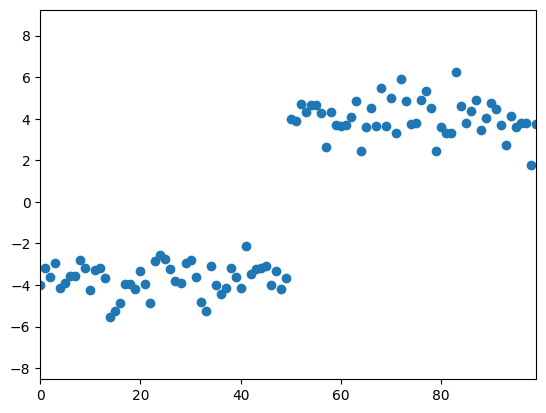

In [61]:
idx = torch.arange(0, len(h))
print(torch.min(idx), torch.max(idx))
print(torch.min(h), torch.max(h))
plt.scatter(idx, h.detach())
plt.axis([torch.min(idx), torch.max(idx), torch.min(h).detach()-3, torch.max(h).detach()+3])

(0.0, 99.0, -0.9960883855819702, 1.9980700016021729)

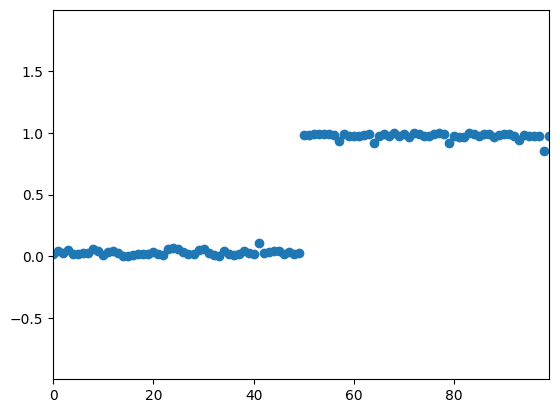

In [62]:
prob = nn.functional.sigmoid(h)
# print(prob[0:5,:])
plt.scatter(idx, prob.detach())
plt.axis([torch.min(idx), torch.max(idx), torch.min(prob).detach()-1, torch.max(prob).detach()+1])

tensor([[False],
        [False],
        [False],
        [False],
        [False]])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=torch.uint8)
100


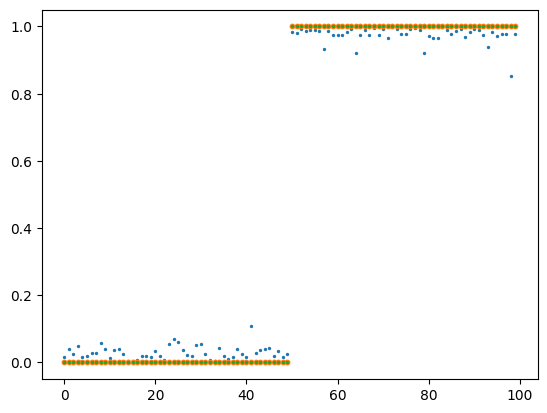

In [84]:
y_pred = prob > 0.5
print(y_pred[0:5,:])
print(y_t)
print(y_t.byte())
cnt = (y_t.byte() == y_pred.view_as(y_t)).sum().item()
print(cnt)
plt.scatter(idx, prob.detach(), s=2)
plt.scatter(idx, y_t, s=10)
plt.scatter(idx, y_pred, s=2)